In [1]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
file_path = "/content/drive/MyDrive/pr-2,lvl-1,oasis/dataset_airbnb.csv"

In [3]:
import pandas as pd
df = pd.read_csv(file_path)

In [4]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
print(df.dtypes)
print(df['neighbourhood_group'].unique())
print("Number of unique IDs:", df['id'].nunique())

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Number of unique IDs: 48895


In [6]:
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [17]:
df = df.dropna(subset=['name'])
df = df.dropna(subset=['host_name'])
df['last_review'].fillna('0000-00-00', inplace=True)
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0000-00-00,1.373221,1,365


In [18]:
print(df.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [19]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


In [29]:
df['room_type'] = df['room_type'].str.lower()
df['name'] = df['name'].str.lower()
df['host_name'] = df['host_name'].str.lower()
df['neighbourhood_group'] = df['neighbourhood_group'].str.lower()
df['neighbourhood'] = df['neighbourhood'].str.lower()
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean & quiet apt home by the park,2787,john,brooklyn,kensington,40.64749,-73.97237,private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,skylit midtown castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,the village of harlem....new york !,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private room,150,3,0,0000-00-00,1.373221,1,365


with outliers


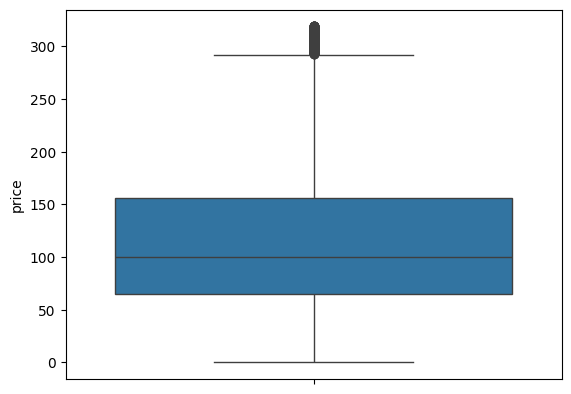

In [40]:
import seaborn as sns
sns.boxplot(df['price'])
print('with outliers')

In [44]:
import matplotlib.pyplot as plt


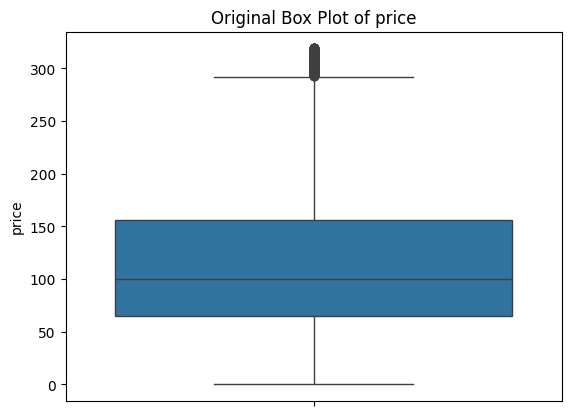

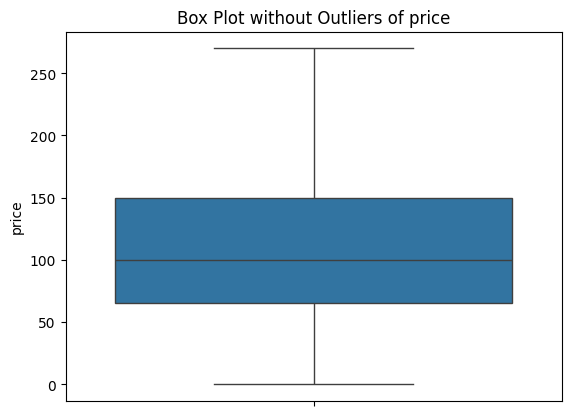

In [47]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 270

no_outliers = removal_box_plot(df, 'price', threshold_value)